Put this in bluenose.
Before running, download the PyTPG directory into the same directory as this notebook.
on bluenose, run the following:

!pip install numpy
!pip install -e
!pip install bitarray
!pip install matplotlib
!pip install gym


In [67]:
#Run this block to make sure you have the dependancies installed
#Anything that doesn't work can usually be resolved using pip
import tpg
import numpy as np
import matplotlib.pyplot as plt
import gym
import atari_py
import gym.spaces
from gym import wrappers
from tpg.tpg_trainer import TpgTrainer
from tpg.tpg_agent import TpgAgent
import time
from IPython import display
from scipy import misc


In [70]:
#functions for rendering over Jupyter as used in Ryan Ameral's example
def show_state(env, step=0, name='', info=''):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
#uses only red instead of RGB
def getState(state):
    state2 = []
    for x in state:
        for y in x:
            state2.append(y[0])
            
    return state2

In [69]:
#build openAI gym environment and print the size of the action space
env = gym.make('Breakout-v4')
#wrap the env object so that we can save video of the learning process :)
#note that this will end up saving to the directory which the code is saved in
env = wrappers.Monitor(env, './videos/breakout-experiment-1', force=True)
print(env.action_space)

Discrete(4)


**The follwing is the most basic implementation. 
It a basic generational selection procedure for the Breakout game based on visual input.
As is common practice in computer vision, RGB images have been downsized to one channel.

*WARNING!!!!!!
**THIS BLOCK OF CODE WILL TAKE !HOURS! TO RUN!!!!!!!!!!!

In [73]:
#I cant get MP working so try again with default
#NOTE: NP code seems to work but crashes my pc.
%matplotlib inline

#used to track time
tStart = time.time()

# first create an instance of the TpgTrainer
# this creates the whole population and everything
trainer = TpgTrainer(actions=range(4), teamPopSize=50)

curScores = [] # hold scores in a generation
pp_summaryScores = [] # record score summaries for each gen (min, max, avg)

isDone = True

for gen in range(30): # generation loop
    curScores = [] # new list per gen
    
    while True: # loop to go through agents
        teamNum = trainer.remainingAgents()
        agent = trainer.getNextAgent()
        if agent is None:
            break # no more agents, so proceed to next gen
        # check if agent already has score
        if agent.taskDone():
            score = agent.getOutcome()
        else:
            if isDone:
                state = preprocess(env.reset()) # get initial state and prep environment
            score = 0
            for i in range(201):

                    sshow_state(env, i, 'Breakout', 'Gen #' + str(gen) + ', Team #' + str(teamNum) + ', Score: ' + str(score)) # render env
                    act = agent.act(state) # get action from agent
                    for result in pp_summaryScores:
                        print('\nResults:\nMin, Max, Avg')
                        print(result[0],result[1],result[2])
                    # feedback from env
                    state, reward, isDone, debug = env.step(act)
                    state = preprocess(state)
                    score += reward # accumulate reward in score
                    if isDone:
                        break # end early if losing state
            agent.reward(score) # must reward agent (if didn't already score)
        curScores.append(score) # store score
            
    # at end of generation, make summary of scores
    pp_summaryScores.append((min(curScores), max(curScores),
                    sum(curScores)/len(curScores))) # min, max, avg
    trainer.evolve()
    
#clear_output(wait=True)
print('Time Taken (Seconds): ' + str(time.time() - tStart))
print('Results:\nMin, Max, Avg')
for result in pp_summaryScores:
    print(result[0],result[1],result[2])

Error: Tried to reset environment which is not done. While the monitor is active for Breakout-v4, you cannot call reset() unless the episode is over.

array([2, 4, 6, 8])

In [71]:
#Write some code here for environment preprocessing.

def preprocess(observation):
    #use numpy to convert each pixel to grayscale
    grayscale_observation = observation.mean(2)

    # Resize grayscale frame to a 25x25 matrix of 32-bit floats.
    resized_observation = misc.imresize(grayscale_observation, (25, 25)).astype(np.float32)

    return np.expand_dims(resized_observation, 2)



SyntaxError: invalid syntax (<ipython-input-10-dea7eed85b59>, line 20)

[(0.0, 3.0, 0.26), (0.0, 3.0, 0.36363636363636365), (0.0, 2.0, 0.4666666666666667), (0.0, 3.0, 0.6595744680851063), (0.0, 3.0, 0.7333333333333333), (0.0, 3.0, 0.7441860465116279), (0.0, 3.0, 0.9090909090909091), (0.0, 3.0, 1.119047619047619), (0.0, 3.0, 1.125), (0.0, 3.0, 1.2), (0.0, 3.0, 1.2), (0.0, 3.0, 0.9473684210526315), (0.0, 3.0, 1.1219512195121952), (0.0, 3.0, 1.146341463414634), (0.0, 2.0, 1.170731707317073), (0.0, 3.0, 1.2926829268292683), (0.0, 3.0, 1.0476190476190477), (0.0, 3.0, 1.1794871794871795), (0.0, 3.0, 1.1904761904761905), (0.0, 3.0, 1.2619047619047619), (0.0, 3.0, 1.3076923076923077), (0.0, 3.0, 1.146341463414634), (0.0, 3.0, 1.2195121951219512), (0.0, 3.0, 1.275), (0.0, 3.0, 1.0571428571428572), (0.0, 3.0, 1.2857142857142858), (0.0, 3.0, 1.25), (0.0, 3.0, 1.2564102564102564), (0.0, 3.0, 1.1904761904761905), (0.0, 3.0, 1.25)]


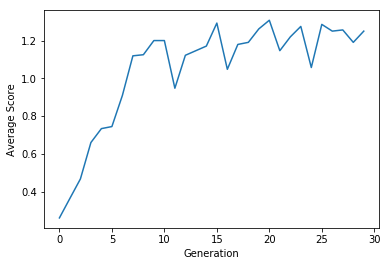

In [54]:
print(pp_summaryScores)
pp_avgs = [x[2] for x in pp_summaryScores]
plt.plot(pp_avgs)
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.show()